# Monte Carlo - Knapsack Counting
[source: https://en.wikipedia.org/wiki/Knapsack_problem]

The knapsack problem is a problem in combinatorial optimization: Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible. It derives its name from the problem faced by someone who is constrained by a fixed-size knapsack and must fill it with the most valuable items. The problem often arises in resource allocation where the decision makers have to choose from a set of non-divisible projects or tasks under a fixed budget or time constraint, respectively.

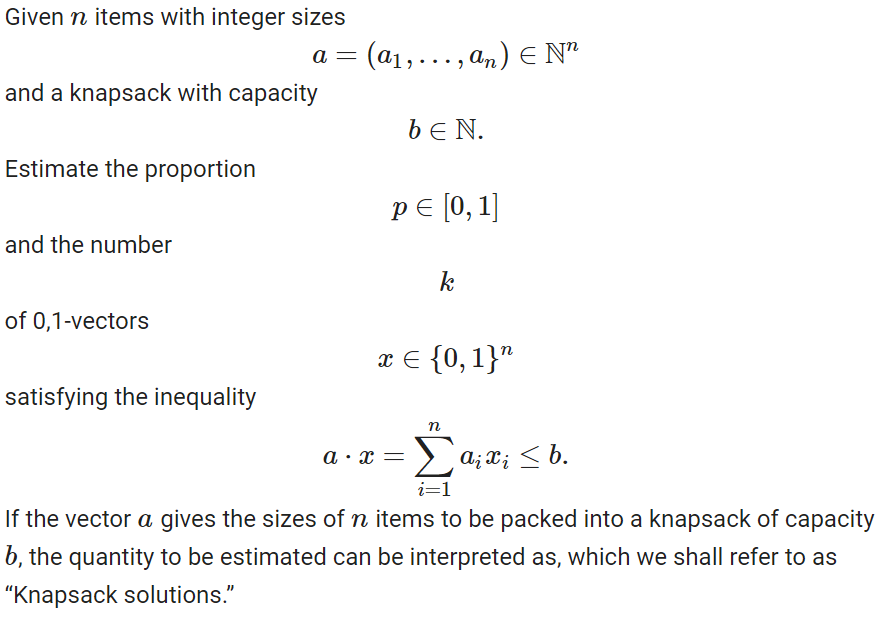

## Count and calculate the exact proportion of  “Knapsack solutions.” for the problem in the image

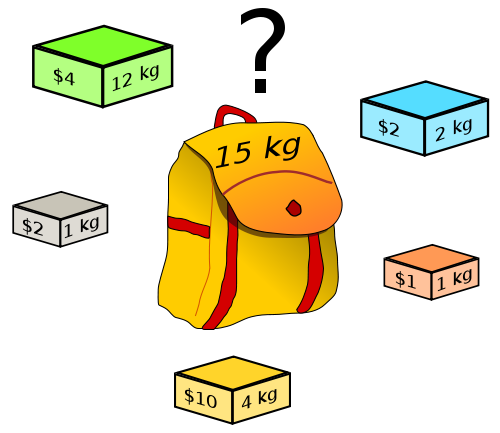

In [6]:
import numpy as np

# Exact calculation -> Consider all combinations.
def allBinaryArrays(size):
  """
    Returns all binary vectors for size 'size'
  """
  arrays = [[0], [1]]
  for _ in range(size-1):
    ln = len(arrays)
    for i in range(ln):
      temp = arrays.pop(0)
      curr1 = temp.copy()
      curr2 = temp.copy()
      
      curr1.append(0)
      curr2.append(1)
      arrays.append(curr1)
      arrays.append(curr2)
  return arrays

# Exact proportion of solutions for the problem in the image
weights = [1, 1, 2, 4, 12]
totalWeight = 15
countKnapsackSolutions = 0

binaryArrays = allBinaryArrays(len(weights))
for binaryArray in binaryArrays:
  if np.dot(binaryArray, weights) <= totalWeight:
    countKnapsackSolutions += 1

print("Knapsack Solutions:", countKnapsackSolutions )
print("Total # of combinations:", len(binaryArrays))
print("Proportion:", countKnapsackSolutions/len(binaryArrays))

Knapsack Solutions: 23
Total # of combinations: 32
Proportion: 0.71875


### Estimate the proportion and number of “Knapsack solutions.” if the sizes are (1,2,3,4,5,6,7,9,10) and the capacity of the knapsack is 10 using Mote Carlo with 1.000, 10.000 random binary vectors.

In [2]:
# With 1_000 random binary vectors

import numpy as np

nBinaryVectors = 1000
weights = list(range(1, 11))
totalWeight = 10

countKnapsackSolutions = 0
for _ in range(nBinaryVectors):
  randomBinaryArray = np.random.randint(2, size=len(weights))

  if np.dot(randomBinaryArray, weights) <= totalWeight:
    countKnapsackSolutions += 1

print("Knapsack Solutions:", countKnapsackSolutions )
print("Total # of combinations:", nBinaryVectors)
print("Proportion:", countKnapsackSolutions/nBinaryVectors )

Knapsack Solutions: 30
Total # of combinations: 1000
Proportion: 0.03


In [3]:
# With 10_000 random binary vectors

import numpy as np

nBinaryVectors = 10000
weights = list(range(1, 11))
totalWeight = 10

countKnapsackSolutions = 0
for _ in range(nBinaryVectors):
  randomBinaryArray = np.random.randint(2, size=len(weights))

  if np.dot(randomBinaryArray, weights) <= totalWeight:
    countKnapsackSolutions += 1

print("Knapsack Solutions:", countKnapsackSolutions )
print("Total # of combinations:", nBinaryVectors)
print("Proportion:", countKnapsackSolutions/nBinaryVectors )

Knapsack Solutions: 448
Total # of combinations: 10000
Proportion: 0.0448


### Estimate the proportion and number of “Knapsack solutions.” if the sizes are (1,2,3,4,…, 49,50) and the capacity of the knapsack are 10, 50, 100, 1275 using Mote Carlo with 10.000, 100.000 and 1.000.000 random binary vectors.

In [19]:
def monteCarloKnapsackProportion(nBinaryVectors, weights, capacities):
  import numpy as np

  countKnapsackSolutions = [0]*len(capacities)

  for _ in range(nBinaryVectors):
    randomBinaryArray = np.random.randint(2, size=len(weights))

    for i in range(len(capacities)):
      if np.dot(randomBinaryArray, weights) <= capacities[i]:
        countKnapsackSolutions[i]+=1

  for i in range(len(capacities)):
    print("_____________________________________________________\nCapacity of Knapsack:",capacities[i],"\nN. Binary Vectors", nBinaryVectors)
    print("Knapsack Solutions:", countKnapsackSolutions[i] )
    print("Proportion:", countKnapsackSolutions[i]/nBinaryVectors )

In [14]:
monteCarloKnapsackProportion(10000, list(range(1,51)), [10, 50, 100, 1275])
monteCarloKnapsackProportion(100000, list(range(1,51)), [10, 50, 100, 1275])
monteCarloKnapsackProportion(1000000, list(range(1,51)), [10, 50, 100, 1275])

_____________________________________________________
Capacity of Knapsack: 10 
N. Binary Vectors 10000
Knapsack Solutions: 0
Proportion: 0.0
_____________________________________________________
Capacity of Knapsack: 50 
N. Binary Vectors 10000
Knapsack Solutions: 0
Proportion: 0.0
_____________________________________________________
Capacity of Knapsack: 100 
N. Binary Vectors 10000
Knapsack Solutions: 0
Proportion: 0.0
_____________________________________________________
Capacity of Knapsack: 1275 
N. Binary Vectors 10000
Knapsack Solutions: 10000
Proportion: 1.0
_____________________________________________________
Capacity of Knapsack: 10 
N. Binary Vectors 100000
Knapsack Solutions: 0
Proportion: 0.0
_____________________________________________________
Capacity of Knapsack: 50 
N. Binary Vectors 100000
Knapsack Solutions: 0
Proportion: 0.0
_____________________________________________________
Capacity of Knapsack: 100 
N. Binary Vectors 100000
Knapsack Solutions: 0
Proportion:

Considerando que $$1+2+3+...+49+50 = 1275$$

todos los vectores binarios resultaran en soluciones al problema. Asimismo, es poco probable que se obtenga un vector binario que cuyo producto punto con los pesos sea menor a 10, 50 y 100.